In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
import seaborn as sns
import warnings

from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
from sqlalchemy import create_engine

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.3f}'.format
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [100]:
ogr=pd.read_csv("C:\\Users\\Gunesim\\Desktop\\Çalışmalar\\StudentsPerformance.csv", 
                      engine="python", encoding="utf8")
ogr.columns=["Cinsiyet", "Etnik_Köken", "Aile_Eğitim_Seviyesi", "Öğle_Yemeği", 
             "Hazırlık_Kursu", "Matematik_Puanı", "Okuma_Puanı", "Yazma_Puanı"]

1NCİ SORU:

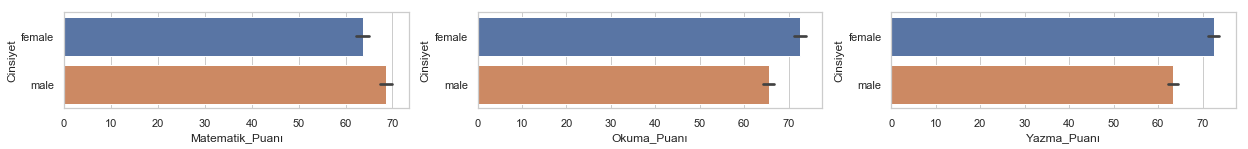

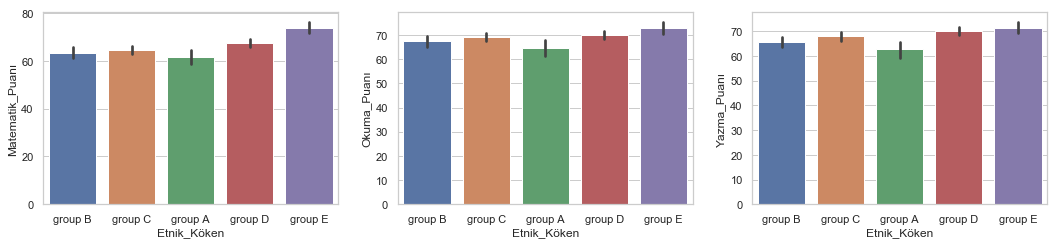

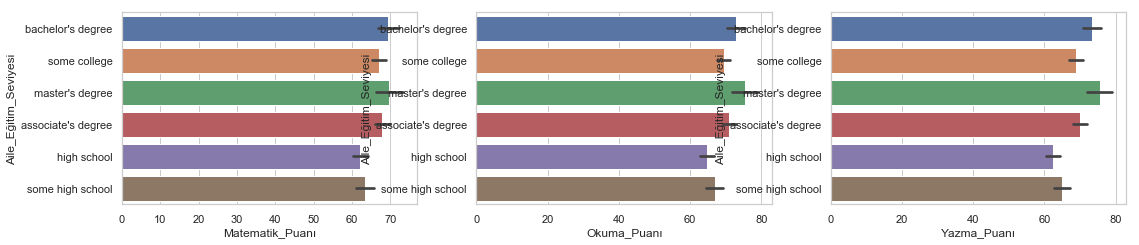

In [104]:
plt.figure(figsize=(21,6))

plt.subplot(3,3,1)
sns.barplot(ogr["Matematik_Puanı"], ogr["Cinsiyet"])
plt.subplot(3,3,2)
sns.barplot(ogr["Okuma_Puanı"], ogr["Cinsiyet"])
plt.subplot(3,3,3)
sns.barplot(ogr["Yazma_Puanı"], ogr["Cinsiyet"])

plt.figure(figsize=(18,12))
plt.subplot(3,3,4)
sns.barplot(ogr["Etnik_Köken"],ogr["Matematik_Puanı"])
plt.subplot(3,3,5)
sns.barplot(ogr["Etnik_Köken"],ogr["Okuma_Puanı"])
plt.subplot(3,3,6)
sns.barplot(ogr["Etnik_Köken"],ogr["Yazma_Puanı"])

plt.figure(figsize=(18,12))
plt.subplot(3,3,7)
sns.barplot(ogr["Matematik_Puanı"],ogr["Aile_Eğitim_Seviyesi"])
plt.subplot(3,3,8)
sns.barplot(ogr["Okuma_Puanı"],ogr["Aile_Eğitim_Seviyesi"])
plt.subplot(3,3,9)
sns.barplot(ogr["Yazma_Puanı"],ogr["Aile_Eğitim_Seviyesi"])

plt.show()

In [102]:
sinavlar=["Matematik_Puanı", "Okuma_Puanı", "Yazma_Puanı"]
degerler=["Cinsiyet", "Etnik_Köken", "Aile_Eğitim_Seviyesi"]
sahsi_bilgiler=[ogr["Cinsiyet"].unique(), ogr["Etnik_Köken"].unique(), ogr["Aile_Eğitim_Seviyesi"].unique()]

for puan_turu in sinavlar:
    tablo_1=pd.DataFrame(columns=["degisken_1", "degisken_2", "istatistik", "p_degeri"])
    tablo_2=pd.DataFrame(columns=["degisken_1", "degisken_2", "istatistik", "p_degeri"])
    tablo_3=pd.DataFrame(columns=["degisken_1", "degisken_2", "istatistik", "p_degeri"])
    tablo=[tablo_1, tablo_2, tablo_3]
    
    for k in range(0, len(sahsi_bilgiler)):
        for i in range(0, len(sahsi_bilgiler[k])):
            for j in range(i+1, len(sahsi_bilgiler[k])):
                ttest=sts.ttest_ind(ogr[ogr[degerler[k]]==sahsi_bilgiler[k][i]][puan_turu], 
                                        ogr[ogr[degerler[k]]==sahsi_bilgiler[k][j]][puan_turu])
                
                tablo[k]=tablo[k].append({"degisken_1":sahsi_bilgiler[k][i], "degisken_2":sahsi_bilgiler[k][j], 
                                        "istatistik":ttest[0], "p_degeri":ttest[1]}, 
                                        ignore_index=True)
    
    
    print("{} için T Testi Sonucu".format(puan_turu))
    display(tablo)

Matematik_Puanı için T Testi Sonucu


[  degisken_1 degisken_2  istatistik  p_degeri
 0     female       male      -5.383     0.000,
   degisken_1 degisken_2  istatistik  p_degeri
 0    group B    group C      -0.732     0.465
 1    group B    group A       0.936     0.350
 2    group B    group D      -2.828     0.005
 3    group B    group E      -6.007     0.000
 4    group C    group A       1.600     0.110
 5    group C    group D      -2.419     0.016
 6    group C    group E      -6.128     0.000
 7    group A    group D      -3.347     0.001
 8    group A    group E      -5.936     0.000
 9    group D    group E      -4.282     0.000,
             degisken_1          degisken_2  istatistik  p_degeri
 0    bachelor's degree        some college       1.370     0.172
 1    bachelor's degree     master's degree      -0.149     0.882
 2    bachelor's degree  associate's degree       0.879     0.380
 3    bachelor's degree         high school       4.236     0.000
 4    bachelor's degree    some high school       3.197  

Okuma_Puanı için T Testi Sonucu


[  degisken_1 degisken_2  istatistik  p_degeri
 0     female       male       7.959     0.000,
   degisken_1 degisken_2  istatistik  p_degeri
 0    group B    group C      -1.322     0.187
 1    group B    group A       1.363     0.174
 2    group B    group D      -1.945     0.052
 3    group B    group E      -3.386     0.001
 4    group C    group A       2.575     0.010
 5    group C    group D      -0.797     0.426
 6    group C    group E      -2.713     0.007
 7    group A    group D      -3.047     0.002
 8    group A    group E      -4.071     0.000
 9    group D    group E      -2.011     0.045,
             degisken_1          degisken_2  istatistik  p_degeri
 0    bachelor's degree        some college       2.205     0.028
 1    bachelor's degree     master's degree      -1.054     0.293
 2    bachelor's degree  associate's degree       1.298     0.195
 3    bachelor's degree         high school       5.018     0.000
 4    bachelor's degree    some high school       3.404  

Yazma_Puanı için T Testi Sonucu


[  degisken_1 degisken_2  istatistik  p_degeri
 0     female       male       9.980     0.000,
   degisken_1 degisken_2  istatistik  p_degeri
 0    group B    group C      -1.596     0.111
 1    group B    group A       1.462     0.145
 2    group B    group D      -3.199     0.001
 3    group B    group E      -3.383     0.001
 4    group C    group A       2.849     0.005
 5    group C    group D      -1.890     0.059
 6    group C    group E      -2.350     0.019
 7    group A    group D      -4.156     0.000
 8    group A    group E      -4.223     0.000
 9    group D    group E      -0.824     0.410,
             degisken_1          degisken_2  istatistik  p_degeri
 0    bachelor's degree        some college       2.680     0.008
 1    bachelor's degree     master's degree      -1.000     0.319
 2    bachelor's degree  associate's degree       2.116     0.035
 3    bachelor's degree         high school       6.547     0.000
 4    bachelor's degree    some high school       4.668  

Yukarıdaki listede p değeri;

>0.05 ve daha büyük olanlar arasındaki fark anlamlı,

>0.05'ten küçük olanlar arasındaki fark anlamsızdır.

2NCİ SORU:

Matematik_Puanı için değerler


Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)

Okuma_Puanı için değerler


Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)

Yazma_Puanı için değerler


Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)

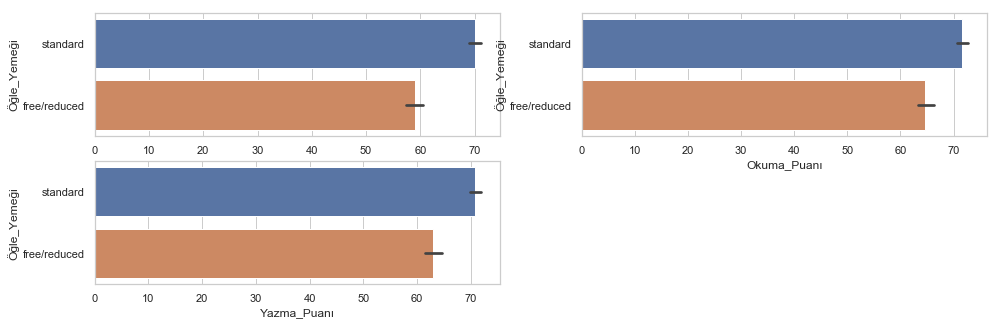

In [140]:
plt.figure(figsize=(16,5))

plt.subplot(2,2,1)
sns.barplot(ogr["Matematik_Puanı"], ogr["Öğle_Yemeği"])
plt.subplot(2,2,2)
sns.barplot(ogr["Okuma_Puanı"], ogr["Öğle_Yemeği"])
plt.subplot(2,2,3)
sns.barplot(ogr["Yazma_Puanı"], ogr["Öğle_Yemeği"])

for p in ["Matematik_Puanı", "Okuma_Puanı", "Yazma_Puanı"]:
    print(p, "için değerler")
    display(sts.ttest_ind(ogr[ogr["Öğle_Yemeği"]=="standard"][p], ogr[ogr["Öğle_Yemeği"]=="free/reduced"][p]))

Öğle yemeği türü ile sınav başarısı arasındaki fark, istatistiksel olarak anlamlıdır.

3NCÜ SORU:

Matematik Puanı


Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)

Okuma Puanı


Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)

Yazma Puanı


Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)

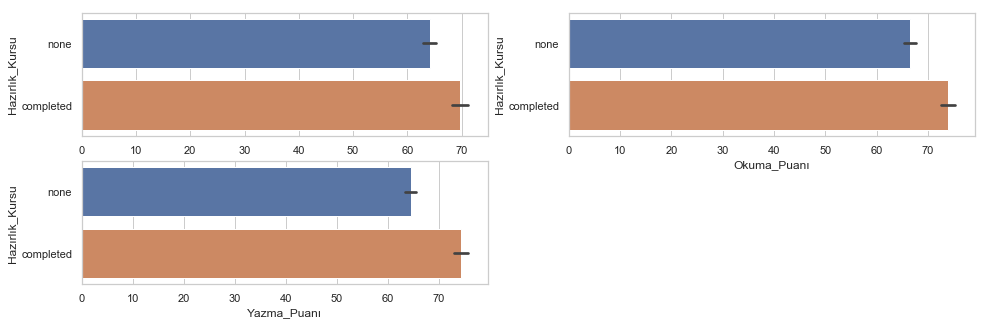

In [151]:
plt.figure(figsize=(16,5))

plt.subplot(2,2,1)
sns.barplot(ogr["Matematik_Puanı"], ogr["Hazırlık_Kursu"])
plt.subplot(2,2,2)
sns.barplot(ogr["Okuma_Puanı"], ogr["Hazırlık_Kursu"])
plt.subplot(2,2,3)
sns.barplot(ogr["Yazma_Puanı"], ogr["Hazırlık_Kursu"])

print("Matematik Puanı")
display(sts.ttest_ind(ogr[ogr["Hazırlık_Kursu"]=="none"]["Matematik_Puanı"], 
                      ogr[ogr["Hazırlık_Kursu"]=="completed"]["Matematik_Puanı"]))
print("Okuma Puanı")
display(sts.ttest_ind(ogr[ogr["Hazırlık_Kursu"]=="none"]["Okuma_Puanı"], 
                      ogr[ogr["Hazırlık_Kursu"]=="completed"]["Okuma_Puanı"]))
print("Yazma Puanı")
display(sts.ttest_ind(ogr[ogr["Hazırlık_Kursu"]=="none"]["Yazma_Puanı"], 
                      ogr[ogr["Hazırlık_Kursu"]=="completed"]["Yazma_Puanı"]))

Hazırlık kursunu tamamlama durumu ile sınav başarısı arasındaki fark, istatistiksel olarak anlamlıdır.

4NCÜ SORU:

In [152]:
ogr.corr()

,Matematik_Puanı,Okuma_Puanı,Yazma_Puanı
Matematik_Puanı,1.000,0.818,0.803
Okuma_Puanı,0.818,1.000,0.955
Yazma_Puanı,0.803,0.955,1.000


Okuma dersi ile Yazma dersi arasında çok güçlü bir ilişki vardır.